Loading features...
Train features: (29143, 7500), Test features: (7286, 7500)
=== MODEL TRAINING AND EVALUATION ===


Model Training:   0%|          | 0/5 [00:00<?, ?it/s]


Training LogisticRegression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training time for LogisticRegression: 3.46 seconds
=== LogisticRegression Evaluation ===
Accuracy: 0.9911
F1 Score: 0.9918

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3328
           1       0.99      0.99      0.99      3958

    accuracy                           0.99      7286
   macro avg       0.99      0.99      0.99      7286
weighted avg       0.99      0.99      0.99      7286



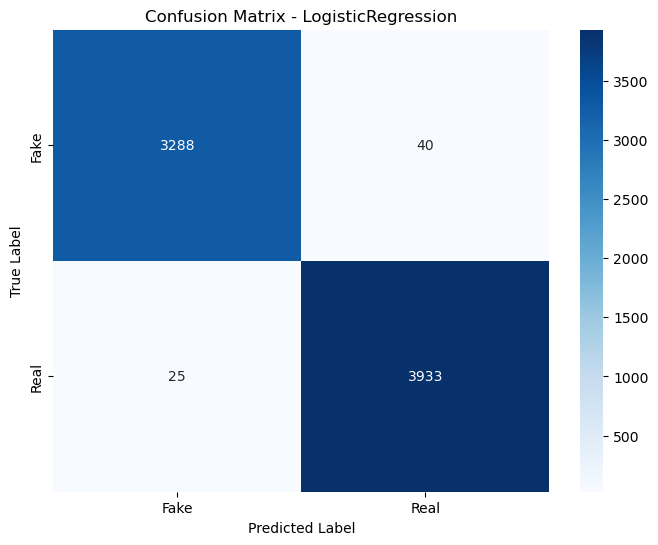

Model Training:  20%|██        | 1/5 [00:03<00:14,  3.66s/it]

Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2'}
Best CV score for LogisticRegression: 0.9924

Training MultinomialNB...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training time for MultinomialNB: 0.43 seconds
=== MultinomialNB Evaluation ===
Accuracy: 0.9516
F1 Score: 0.9552

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3328
           1       0.96      0.95      0.96      3958

    accuracy                           0.95      7286
   macro avg       0.95      0.95      0.95      7286
weighted avg       0.95      0.95      0.95      7286



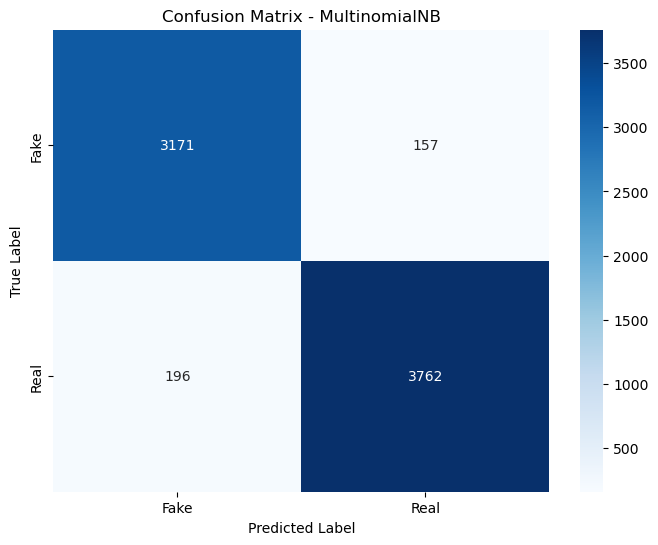

Model Training:  40%|████      | 2/5 [00:04<00:05,  1.84s/it]

Best parameters for MultinomialNB: {'alpha': 0.1}
Best CV score for MultinomialNB: 0.9579

Training LinearSVC...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training time for LinearSVC: 3.21 seconds
=== LinearSVC Evaluation ===
Accuracy: 0.9919
F1 Score: 0.9926

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3328
           1       0.99      0.99      0.99      3958

    accuracy                           0.99      7286
   macro avg       0.99      0.99      0.99      7286
weighted avg       0.99      0.99      0.99      7286



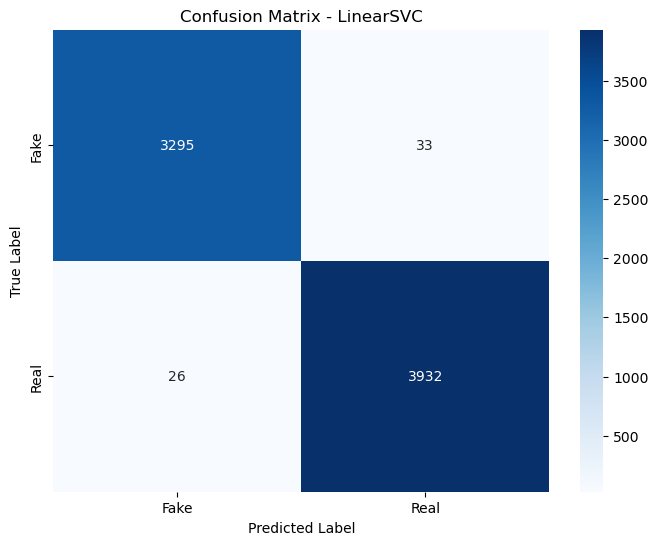

Model Training:  60%|██████    | 3/5 [00:07<00:05,  2.54s/it]

Best parameters for LinearSVC: {'C': 1}
Best CV score for LinearSVC: 0.9937

Training RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time for RandomForest: 192.11 seconds
=== RandomForest Evaluation ===
Accuracy: 0.9960
F1 Score: 0.9963

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3328
           1       0.99      1.00      1.00      3958

    accuracy                           1.00      7286
   macro avg       1.00      1.00      1.00      7286
weighted avg       1.00      1.00      1.00      7286



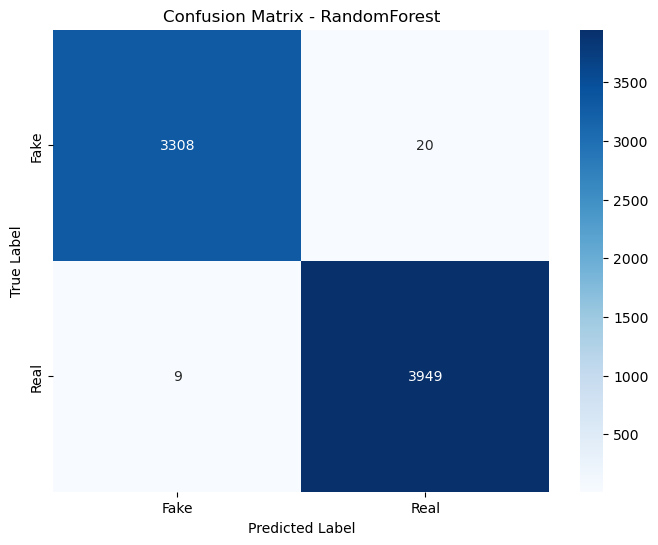

Model Training:  80%|████████  | 4/5 [03:20<01:17, 77.60s/it]

Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 200}
Best CV score for RandomForest: 0.9964

Training XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Training time for XGBoost: 405.90 seconds
=== XGBoost Evaluation ===
Accuracy: 0.9966
F1 Score: 0.9968

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3328
           1       1.00      1.00      1.00      3958

    accuracy                           1.00      7286
   macro avg       1.00      1.00      1.00      7286
weighted avg       1.00      1.00      1.00      7286



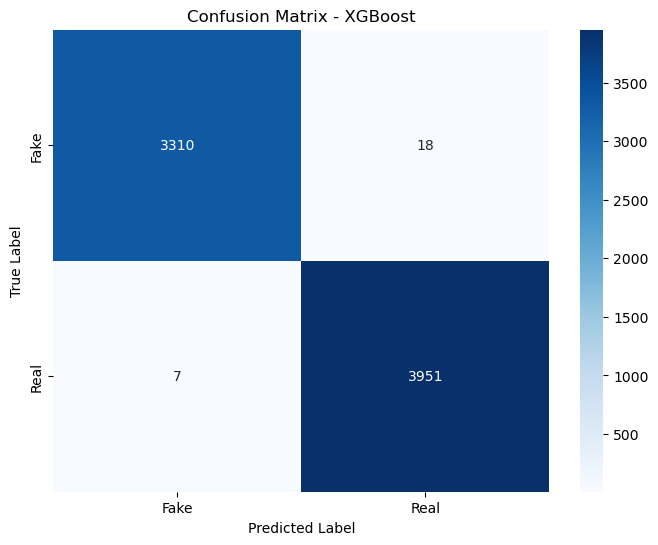

Model Training: 100%|██████████| 5/5 [10:06<00:00, 121.27s/it]

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best CV score for XGBoost: 0.9963

=== MODEL COMPARISON ===
                Model  Accuracy  F1_Score
4             XGBoost  0.996569  0.996846
3        RandomForest  0.996020  0.996342
2           LinearSVC  0.991902  0.992553
0  LogisticRegression  0.991079  0.991804
1       MultinomialNB  0.951551  0.955186


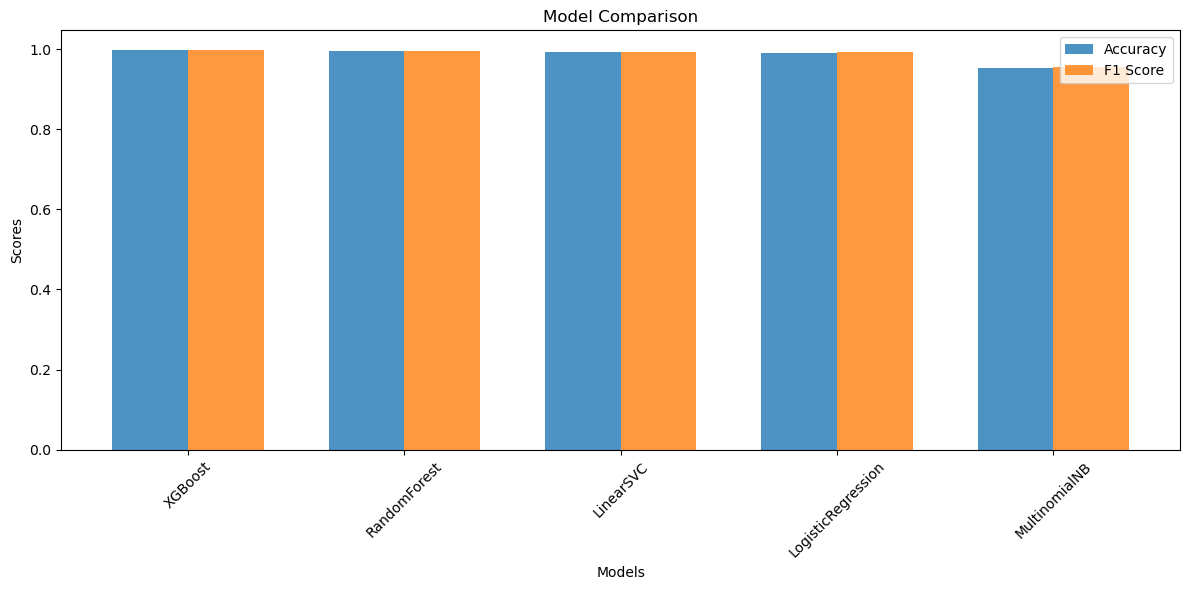

Model saved to c:\Users\Amin\Documents\Ironhack_projects\project-nlp-challenge\models\best_model.pkl

Best model: XGBoost
Best model saved to: c:\Users\Amin\Documents\Ironhack_projects\project-nlp-challenge\models\best_model.pkl


In [1]:
# 04_Model_Training.ipynb
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from config import *
from utils.init import *   # <-- imports evaluate_model, save_model, etc.
import joblib
from tqdm import tqdm
import time
import matplotlib.pyplot as plt


# Load features

print("Loading features...")
X_train = joblib.load(FEATURES_DIR / 'X_train_combined.pkl')
X_test = joblib.load(FEATURES_DIR / 'X_test_combined.pkl')
y_train = joblib.load(FEATURES_DIR / 'y_train.pkl')
y_test = joblib.load(FEATURES_DIR / 'y_test.pkl')

print(f"Train features: {X_train.shape}, Test features: {X_test.shape}")


# Define models and parameter grids

models = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0]
        }
    },
    'LinearSVC': {
        'model': LinearSVC(random_state=RANDOM_STATE, max_iter=2000),
        'params': {
            'C': [0.1, 1, 10]  # regularization strength
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    }
}


# Train and evaluate models

results = {}
best_models = {}

print("=== MODEL TRAINING AND EVALUATION ===")
for name, model_info in tqdm(models.items(), desc="Model Training", total=len(models)):
    print(f"\nTraining {name}...")
    start_time = time.time()

    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=RANDOM_STATE),
        scoring='f1',
        n_jobs=-1,
        verbose=2
    )
    grid_search.fit(X_train, y_train)

    end_time = time.time()
    elapsed = end_time - start_time
    print(f"Training time for {name}: {elapsed:.2f} seconds")

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Call evaluate_model from utils/__init__.py (this will also plot confusion matrix)
    results[name] = evaluate_model(best_model, X_test, y_test, name)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best CV score for {name}: {grid_search.best_score_:.4f}")


# Compare all models

print("\n=== MODEL COMPARISON ===")
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [result['accuracy'] for result in results.values()],
    'F1_Score': [result['f1_score'] for result in results.values()]
}).sort_values('F1_Score', ascending=False)

print(comparison_df)

# Visual comparison

plt.figure(figsize=(12, 6))
x_pos = np.arange(len(comparison_df))
width = 0.35

plt.bar(x_pos - width/2, comparison_df['Accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar(x_pos + width/2, comparison_df['F1_Score'], width, label='F1 Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks(x_pos, comparison_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Save best model

best_model_name = comparison_df.iloc[0]['Model']
best_model = best_models[best_model_name]
save_model(best_model, MODELS_DIR / 'best_model.pkl')

print(f"\nBest model: {best_model_name}")
print(f"Best model saved to: {MODELS_DIR / 'best_model.pkl'}")
